## Estudi de la profunditat de camp i el camp de visió d’una càmera fotogràfica

En aquest exercici simulareu la profunditat de camp i el camp de visió d’una càmera fotogràfica amb un objectiu de focal i diafragma d’obertura variables. Considereu que l’objectiu pot variar la seva distància focal entre els $20$ i els $100$ mm (focals corresponents al format de $35$ mm). El nombre de diafragma N pot prendre valors entre $1.4$ i $32$. Considereu un cercle de confusió admissible de $0.03$ mm de diàmetre.

In [45]:
# Importació de llibreries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**i)** Si enfoquem un objecte O situat a $s=-3$ m utilitzant un diafragma de nombre $N=2.8$, com varia la profunditat de camp en funció de la distància focal $f’$? Representeu tant la 
distància de l'$O$ al punt més proper que es veuria enfocat com al més allunyat, així com la profunditat de camp objecte total.

In [48]:
# Dades

N=2.8
fp = np.arange(1, 101) * 1e-3

s=-3
r=0.015e-3


In [50]:
# Profunditat de camp

sp=1/(1/fp+1/s)

phi_DO=fp/N

Dz1p=2*r*sp/(phi_DO+2*r)
Dz2p=2*r*sp/(phi_DO-2*r)

s1p=sp-Dz1p
s2p=sp+Dz2p

s1=(1/s1p-1/fp)**(-1)
s2=(1/s2p-1/fp)**(-1)
PdC=s2-s1

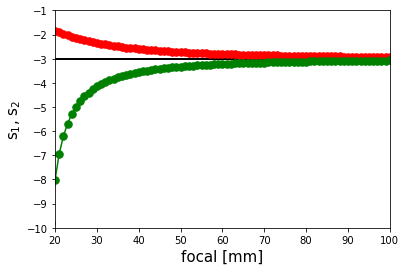

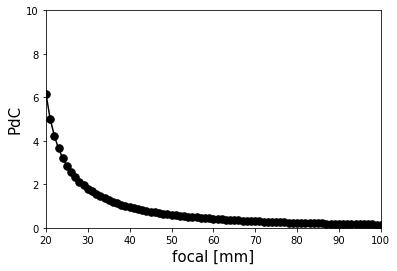

In [52]:
# Gràfics PdC

s_array = np.full(fp.shape, s)

plt.figure()
plt.plot(fp*1e3, s_array, color='k', linewidth=2)
plt.plot(fp*1e3, s2, '.-', color='r', markersize=15)
plt.plot(fp*1e3, s1, '.-', color='g', markersize=15)

plt.ylim([-10,-1])
plt.xlim([20,100])

plt.xlabel('focal [mm]',fontsize=15)
plt.ylabel('s$_1$, s$_2$',fontsize=15)

plt.figure()
plt.plot(fp*1e3, PdC, '.-', color='k', markersize=15)

plt.ylim([0,10])
plt.xlim([20,100])

plt.xlabel('focal [mm]',fontsize=15)
plt.ylabel('PdC',fontsize=15);

**ii)** Amb els mateixos paràmetres de l’apartat i), com varia el camp de visió de l’escena fotografiada

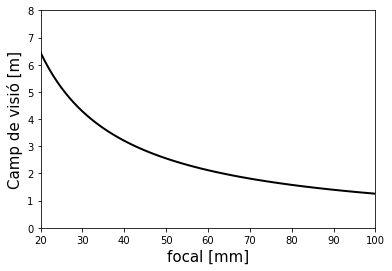

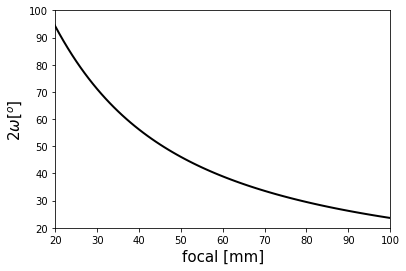

In [55]:
# Camp de visió

a=24e-3;
b=36e-3;
d=1/2*np.sqrt(a**2+b**2);

betap=-sp/s;
ymax=2*d/betap;

omega=np.arctan(ymax/(2*s))*180/np.pi;

plt.figure()
plt.plot(fp*1e3,ymax,color='k',linewidth=2)

plt.xlim([20,100])
plt.ylim([0,8])
plt.xlabel('focal [mm]',fontsize=15)
plt.ylabel('Camp de visió [m]',fontsize=15)


plt.figure()
plt.plot(fp*1e3,np.abs(2*omega),color='k',linewidth=2)

plt.xlim([20,100])
plt.ylim([20,100])
plt.xlabel('focal [mm]',fontsize=15)
plt.ylabel('$2\omega [^o]$',fontsize=15);


**iii)** Triant una focal $f’$ fixa, varieu N per tal de veure com aquest paràmetre afecta a la profunditat de camp. Com es comporta el camp de visió? Discutiu també què succeeix quan la profunditat divergeix.

In [58]:
# Profunditat de camp amb focal fixe i diàmetre variable

fp_fix=50e-3;
N_var=np.sqrt(2)**np.arange(1,26);
phi_DO_N=fp_fix/N_var;

sp_N=(1/fp_fix+1/s)**(-1);
Dz1p_N=2*r*sp_N/(phi_DO_N+2*r);
Dz2p_N=2*r*sp_N/(phi_DO_N-2*r);

s1p_N=sp_N-Dz1p_N;
s2p_N=sp_N+Dz2p_N;

s1_N=(1/s1p_N-1/fp_fix)**(-1);
s2_N=(1/s2p_N-1/fp_fix)**(-1);

PdC_N=s2_N-s1_N;

Text(0, 0.5, 'Profunditat de camp [m]')

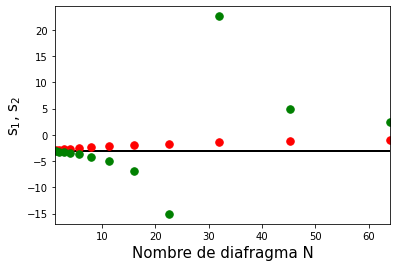

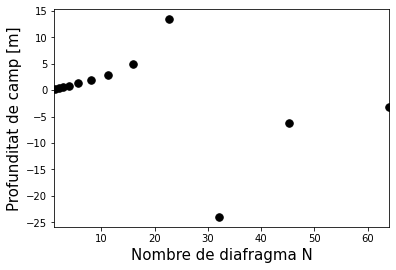

In [60]:
s_array = np.full(N_var.shape, s)
sp_array = np.full(N_var.shape, sp_N)

plt.figure()
plt.plot(N_var,s_array,color='k',linewidth=2)
plt.plot(N_var,s2_N,'.',color='r',markersize=15)
plt.plot(N_var,s1_N,'.',color='g',markersize=15)

plt.xlim([1.2,64])
plt.xlabel('Nombre de diafragma N',fontsize=15)
plt.ylabel('s$_1$, s$_2$',fontsize=15);

plt.figure()
plt.plot(N_var,PdC_N,'.',color='k',markersize=15)

plt.xlim([1.2,64])
plt.xlabel('Nombre de diafragma N',fontsize=15)
plt.ylabel('Profunditat de camp [m]',fontsize=15)

**iv)** Feu tres fotografies amb el vostre mòbil on s’apreciï la diferència en profunditat de camp, i expliqueu quins paràmetres heu canviat per aconseguir-ho. 

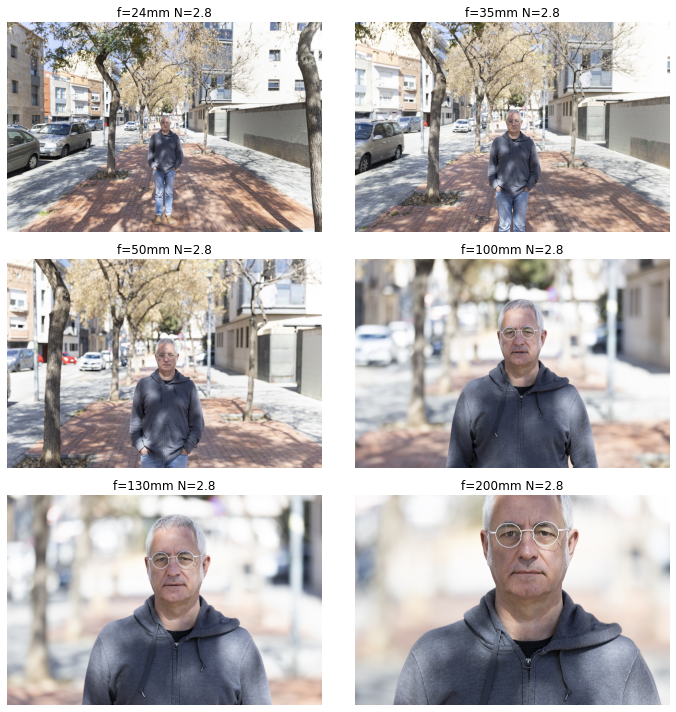

In [119]:
#Imatges corresponents a un objecte situat a 3 metres per diferents distàncies focals
images = ['24mm f2,8.jpg', '35mm f2,8.jpg', '50mm f2,8.jpg', '100mm f2,8.jpg', '130mm f2,8.jpg', '200mm f2,8.jpg']
titles = ['f=24mm N=2.8', 'f=35mm N=2.8', 'f=50mm N=2.8', 'f=100mm N=2.8', 'f=130mm N=2.8', 'f=200mm N=2.8']


# Graficar
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(images[i])  
    ax.imshow(img)
    ax.set_title(titles[i])
    ax.axis('off')                 


plt.tight_layout()
plt.show()